<h1 align = "center">机器学习第四次实验报告</h1>

<h5 align = "center">姓名：邢清画&nbsp&nbsp&nbsp&nbsp         学号：2211999  &nbsp &nbsp&nbsp专业：物联网工程</h5>

### 实验题目

- 朴素贝叶斯分类器

### 实验要求

#### 1.基本要求：

(a)采用分层采样的方式将数据集划分为训练集和测试集 

(b)给定编写一个朴素贝叶斯分类器，对测试机进行预测，计算分类准确率

#### 2.中级要求：

使用测试机评估模型，得到混淆矩阵、精度、召回率、F值

#### 3.高级要求：

在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值

### 代码实现

### 1. **基本要求**

(a)采用分层采样的方式将数据集划分为训练集和测试集 ；(b)给定编写一个朴素贝叶斯分类器，对测试机进行预测，计算分类准确率

为了完成这项任务，我将进行以下步骤：

1. 数据分析和可视化：加载和分析数据以了解其结构和分布。

2. 分层抽样：通过分层抽样将数据集拆分为训练集和测试集，以确保均衡的类分布。
    
3. 朴素贝叶斯分类器：实现朴素贝叶斯分类器，在训练集上训练它，并在测试集上评估它。
    
4. 评估：计算并显示分类精度。


##### **1.1 关键内容：**

##### **1. 数据分析和可视化**：

加载数据集并执行基本的探索性数据分析以了解特征和目标类分布。

wine.names 文件的内容提供了有关数据集的基本信息、来源、历史用途。文件的前面部分提到了数据集的标题为 "Wine recognition data"，并且数据集曾用于不同分类器的性能比较实验。

In [96]:
import pandas as pd

# Load the dataset
data_file = 'wine.data'
names_file = 'wine.names'

# Load the dataset with appropriate column names
columns = [
    "Class", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins",
    "Color_intensity", "Hue", "OD280/OD315_of_diluted_wines", "Proline"
]
data = pd.read_csv(data_file, header=None, names=columns)

# Display basic information about the dataset
data_info = data.describe()
data_class_distribution = data['Class'].value_counts().sort_index()

data_info, data_class_distribution

(            Class     Alcohol  Malic_acid         Ash  Alcalinity_of_ash  \
 count  178.000000  178.000000  178.000000  178.000000         178.000000   
 mean     1.938202   13.000618    2.336348    2.366517          19.494944   
 std      0.775035    0.811827    1.117146    0.274344           3.339564   
 min      1.000000   11.030000    0.740000    1.360000          10.600000   
 25%      1.000000   12.362500    1.602500    2.210000          17.200000   
 50%      2.000000   13.050000    1.865000    2.360000          19.500000   
 75%      3.000000   13.677500    3.082500    2.557500          21.500000   
 max      3.000000   14.830000    5.800000    3.230000          30.000000   
 
         Magnesium  Total_phenols  Flavanoids  Nonflavanoid_phenols  \
 count  178.000000     178.000000  178.000000            178.000000   
 mean    99.741573       2.295112    2.029270              0.361854   
 std     14.282484       0.625851    0.998859              0.124453   
 min     70.000000   

该数据集包含178个条目，其中包含13个特征和一个目标类（Class）。以下是分析中的一些关键点：

目标类分布如下：
* 第1类：59个样品
* 第2类：71个样本
* 第3类：48个样品

这些特征具有多种尺度和分布，这可能会影响朴素贝叶斯分类器的性能。

下面将数据按照类别和特征构建图表，每列的含义对应于葡萄酒的各种理化特征（wine_name.data中给出除类别外的13个特征）。

数据集中包含三类葡萄酒，分别标记为 1、2 和 3。

Alcohol：酒精含量，Malic_acid：苹果酸含量，Ash：灰分，Alcalinity_of_ash：灰分的碱度，Magnesium：镁含量，Total_phenols：总酚含量，Flavanoids：黄酮类化合物，Nonflavanoid_phenols：非黄酮类酚，Proanthocyanins：原花青素，Color_intensity：颜色强度，Hue：色调，OD280/OD315_of_diluted_wines：稀释葡萄酒的 OD280/OD315 比值，Proline：脯氨酸含量

In [97]:
data.columns = columns

data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


接下来，我将可视化一些关键特性在不同类中的分布，以进一步了解数据。（以"Alcohol", "Malic_acid", "Color_intensity", "Proline"四个特征为例）绘制它们在不同类别中的分布图。通过可视化，可以更好地理解各类别之间的差异，观察到某些特征在不同类别中确实有明显的分布差异，有助于分类器进行有效的分类。

d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a len

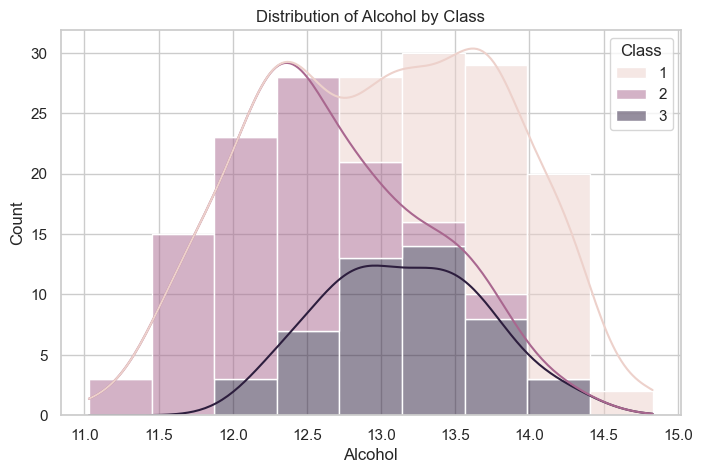

d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a len

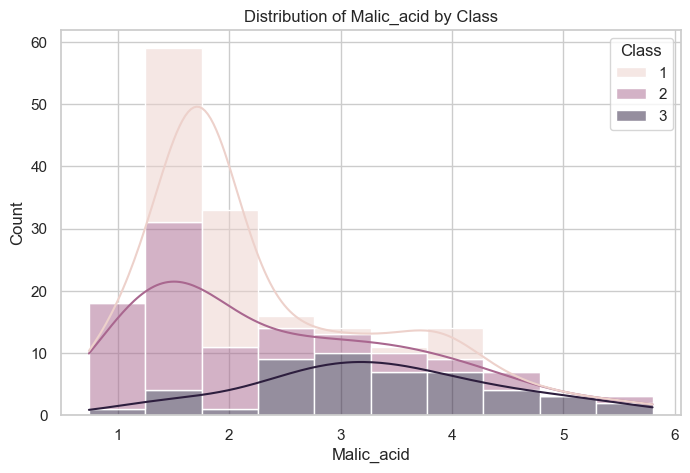

d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a len

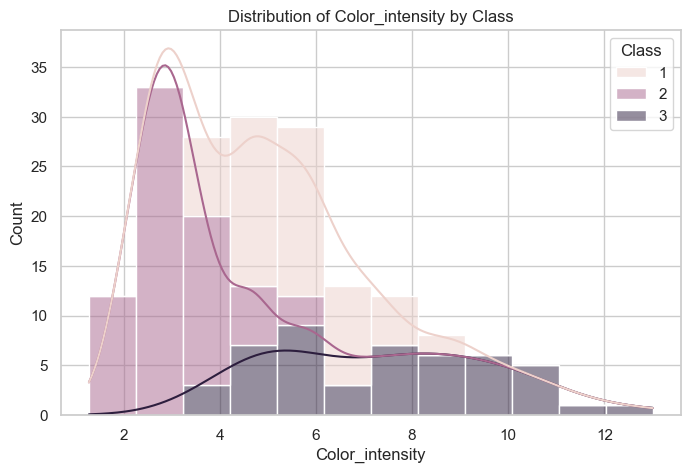

d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Miniconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a len

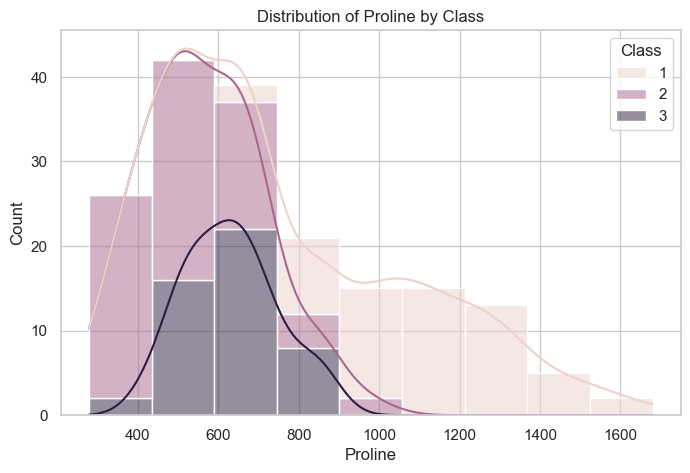

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置可视化风格
sns.set(style="whitegrid")

# 选择部分特征
features_to_plot = ["Alcohol", "Malic_acid", "Color_intensity", "Proline"]

for feature in features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(data, x=feature, hue="Class", multiple="stack", kde=True)
    plt.title(f"Distribution of {feature} by Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

##### **2. 分层采样划分数据集**：

葡萄酒数据集中有三种葡萄酒类别（Class 1, Class 2, Class 3），分层采样可以保证每个类别在训练集和测试集中的比例相同，从而提高模型在不同类别上的表现。

将数据集拆分为训练集和测试集（8:2），这样可以确保模型在不同类别上有均衡的表现，不会因为类别不均衡而偏向于某个类别。

In [99]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop("Class", axis=1)
y = data["Class"]

# Stratified sampling to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()

train_class_distribution, test_class_distribution

(Class
 1    47
 2    57
 3    38
 Name: count, dtype: int64,
 Class
 1    12
 2    14
 3    10
 Name: count, dtype: int64)

##### **3. 朴素贝叶斯分类器的实现和预测**：

手动实现朴素贝叶斯分类器，使用的是高斯朴素贝叶斯模型（Gaussian Naive Bayes）

##### **朴素贝叶斯分类器原理**

朴素贝叶斯分类器是一种基于贝叶斯定理的分类方法，其核心思想是通过计算每个类别的条件概率，选择最大概率的类别作为最终的预测结果。

在朴素贝叶斯分类中，给定一个特征向量 $X = (x_1, x_2, \dots, x_d)$，我们要找到类别 $C_k$ 使得后验概率 $P(C_k | X)$ 最大。根据贝叶斯公式：

$$
P(C_k | X) = \frac{P(C_k) \cdot P(X | C_k)}{P(X)}
$$

其中：

- $P(C_k)$ 是类别 $C_k$ 的先验概率。
- $P(X | C_k)$ 是类别 $C_k$ 下特征 $X$ 的条件概率。
- $P(X)$ 是特征向量 $X$ 的边缘概率（在分类任务中无需计算，因为它对所有类别都相同）。

由于假设特征条件独立性（即“朴素”假设），条件概率 $P(X | C_k)$ 可以表示为每个特征的乘积：

$$
P(X | C_k) = \prod_{i=1}^{d} P(x_i | C_k)
$$

在高斯朴素贝叶斯分类器中，假设每个特征 $x_i$ 在给定类别 $C_k$ 时服从高斯分布：

$$
P(x_i | C_k) = \frac{1}{\sqrt{2 \pi \sigma_k^2}} \exp \left( - \frac{(x_i - \mu_k)^2}{2 \sigma_k^2} \right)
$$

其中：

- $\mu_k$ 是类别 $C_k$ 中特征 $x_i$ 的均值。
- $\sigma_k^2$ 是类别 $C_k$ 中特征 $x_i$ 的方差。



In [100]:
import numpy as np

# 1. 计算先验概率
def compute_prior_probabilities(y):
    class_probabilities = y.value_counts(normalize=True)
    return class_probabilities

# 2. 计算每个类别下每个特征的均值和方差
def compute_statistics(X, y):
    # 得到每个类别的统计数据
    stats = {}
    for c in np.unique(y):
        class_data = X[y == c]
        mean = class_data.mean(axis=0)
        var = class_data.var(axis=0)
        stats[c] = {'mean': mean, 'var': var}
    return stats

# 3. 计算高斯分布的概率密度函数
def gaussian_pdf(x, mean, var):
    epsilon = 1e-9  # 防止除零错误
    return (1 / np.sqrt(2 * np.pi * var + epsilon)) * np.exp(-(x - mean) ** 2 / (2 * var + epsilon))

# 4. 计算后验概率并进行分类
def predict(X, stats, priors):
    predictions = []
    for i in range(X.shape[0]):
        posteriors = {}
        for c in stats:
            prior = np.log(priors[c])  # 先验概率
            likelihood = 0
            for j in range(X.shape[1]):
                likelihood += np.log(gaussian_pdf(X[i, j], stats[c]['mean'][j], stats[c]['var'][j]))
            posteriors[c] = prior + likelihood
        predicted_class = max(posteriors, key=posteriors.get)
        predictions.append(predicted_class)
    return np.array(predictions)

# 5. 计算准确率
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

# 使用上一步中划分的训练集和测试集
# 计算先验概率和每个类别的统计数据
priors = compute_prior_probabilities(y_train)
stats = compute_statistics(X_train, y_train)

# 进行预测
y_pred = predict(X_test.values, stats, priors)

# 计算准确率
acc = accuracy(y_test.values, y_pred)
print(f"手动实现朴素贝叶斯分类器的准确率：{acc}")

手动实现朴素贝叶斯分类器的准确率：0.9722222222222222


C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\2945341759.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  likelihood += np.log(gaussian_pdf(X[i, j], stats[c]['mean'][j], stats[c]['var'][j]))


显示真实标签、预测标签的序列，并列出预测错误的样本详情:

In [101]:
# 显示真实标签和预测标签的序列
print("真实标签：", y_test.values)
print("预测标签：", y_pred)

# 找出预测错误的样本
print("\n预测错误的样本详情：")
for idx, (true, pred) in enumerate(zip(y_test.values, y_pred)):
    if true != pred:
        print(f"样本索引：{idx}, 真实标签：{true}, 预测标签：{pred}")

真实标签： [1 3 1 2 2 1 1 2 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]
预测标签： [1 3 1 2 2 1 1 1 2 3 2 3 1 3 1 2 2 1 2 1 2 2 1 1 2 2 1 3 2 3 1 3 2 3 3 3]

预测错误的样本详情：
样本索引：7, 真实标签：2, 预测标签：1


#### 1. 正则化参数 $C$ 的作用

正则化参数 $C$ 在朴素贝叶斯分类器中扮演着重要的角色，主要作用体现在以下几个方面：

- **防止概率为零**：在计算朴素贝叶斯的后验概率时，如果某个特征值在某类别中没有出现过，那么条件概率 $P(x_i|y)$ 会为零，这将导致整体后验概率也为零，进而影响分类结果。引入正则化参数 $C$ 后，即使某个特征没有出现过，其概率值也会有一个非零的平滑值。
- **控制模型的平滑程度**：通过调整 $C$ 的大小，可以控制模型对稀有事件或极端情况的敏感程度。较大的 $C$ 值会平滑条件概率分布，使模型对数据中的噪声不太敏感；而较小的 $C$ 值则使模型更接近实际数据分布。

#### 2. 拉普拉斯平滑中的正则化参数 $C$

在朴素贝叶斯分类器的应用中，拉普拉斯平滑（或称加法平滑）是一种常见的处理方法。它通过在条件概率计算中加入一个正则化项 $C$，避免因为数据稀疏而导致概率为零的问题。具体的条件概率计算公式如下：

$$
P(x_i | y) = \frac{\text{count}(x_i, y) + C}{\text{count}(y) + C \cdot N}
$$

其中：

- $\text{count}(x_i, y)$ 是类别 $y$ 下观察到特征 $x_i$ 的次数。
- $N$ 是特征可能的取值数（例如，对于离散特征，可能的类别总数）。
- $C$ 是正则化参数，通常取值为 1。

通过引入 $C$，即使某些特征在训练集中从未出现过，它们的条件概率也不会为零，从而提高模型的稳定性。

#### 3. 正则化参数 $C$ 的调整

- **增大 $C$**：增大平滑力度，使得所有条件概率更加平滑，避免模型对少数稀有事件过度依赖，降低过拟合风险。这对于数据量少或特征稀疏的数据集较为有效。
- **减小 $C$**：减小平滑力度，模型更贴合实际数据分布，可能会更精确地反映数据的特性。然而，当数据中存在噪声或极端情况时，过小的 $C$ 值可能导致模型对异常数据过度敏感，影响稳定性。

#### 4. 使用正则化参数 $C$ 的场景

- **文本分类**：在文本分类任务中，某些词语在某些类别中可能出现次数较少。正则化参数 $C$ 可以帮助平滑这些词语的概率，从而提升模型对稀有词语的处理能力。
- **小样本数据集**：在样本数量有限的情况下，某些特征的某些取值可能不会出现，导致条件概率为零。此时，加入正则化参数 $C$ 可以平滑概率分布，使模型对小样本数据具有更好的鲁棒性。

通过合理选择正则化参数 $C$，可以使朴素贝叶斯模型在各种场景下表现得更加稳定和准确，尤其是在稀疏数据或小样本场景中。

C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\2975329878.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  likelihood += np.log(gaussian_pdf_new(X[i, j], stats[c]['mean'][j], stats[c]['var'][j], C))


正则化参数 C=1e-05 的分类准确率：0.9722222222222222
正则化参数 C=0.0001 的分类准确率：0.9722222222222222
正则化参数 C=0.001 的分类准确率：0.9722222222222222
正则化参数 C=0.01 的分类准确率：0.9722222222222222
正则化参数 C=0.1 的分类准确率：1.0
正则化参数 C=1 的分类准确率：0.9722222222222222
正则化参数 C=10.0 的分类准确率：0.9166666666666666
正则化参数 C=100.0 的分类准确率：0.8055555555555556
正则化参数 C=1000.0 的分类准确率：0.7222222222222222


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


正则化参数 C=10000.0 的分类准确率：0.6944444444444444
正则化参数 C=100000.0 的分类准确率：0.6944444444444444


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


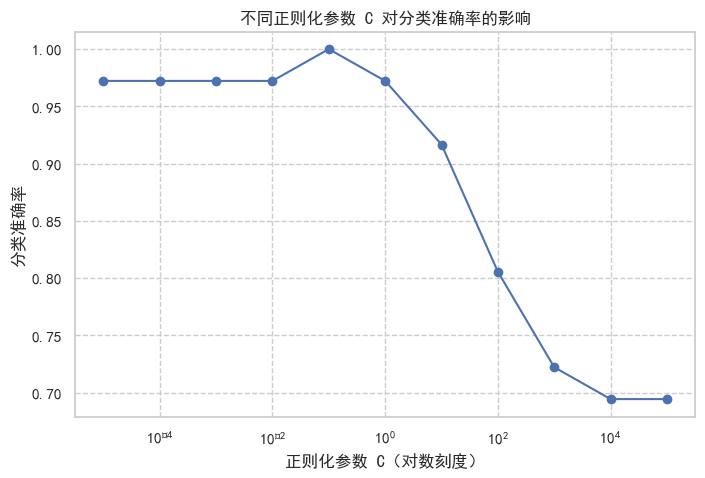

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为 SimHei（黑体），支持中文显示
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False  # 用于正常显示负号

# 修改后的高斯分布概率密度函数，加入正则化参数 C
def gaussian_pdf_new(x, mean, var, C):
    epsilon = 1e-9  # 防止除零错误
    var += C  # 加入正则化参数 C
    return (1 / np.sqrt(2 * np.pi * var + epsilon)) * np.exp(-(x - mean) ** 2 / (2 * var + epsilon))

# 修改后的预测函数，加入正则化参数 C
def predict_with_regularization(X, stats, priors, C):
    predictions = []
    for i in range(X.shape[0]):
        posteriors = {}
        for c in stats:
            prior = np.log(priors[c])  # 先验概率
            likelihood = 0
            for j in range(X.shape[1]):
                likelihood += np.log(gaussian_pdf_new(X[i, j], stats[c]['mean'][j], stats[c]['var'][j], C))
            posteriors[c] = prior + likelihood
        predicted_class = max(posteriors, key=posteriors.get)
        predictions.append(predicted_class)
    return np.array(predictions)

# 定义不同的 C 值并存储准确率
C_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5]
accuracies = []

# 循环不同的 C 值
for C in C_values:
    y_pred = predict_with_regularization(X_test.values, stats, priors, C)
    acc = accuracy(y_test.values, y_pred)
    accuracies.append(acc)
    print(f"正则化参数 C={C} 的分类准确率：{acc}")

# 绘制 C 值与准确率的关系图
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')  # 设置 x 轴为对数刻度
plt.xlabel("正则化参数 C（对数刻度）")
plt.ylabel("分类准确率")
plt.title("不同正则化参数 C 对分类准确率的影响")
plt.grid(True, which="both", ls="--")  # 在对数刻度下启用网格
plt.show()


从图中可以看到不同正则化参数 $C$ 对分类准确率的影响：

1. **小的 $C$ 值（如 $10^{-5}$ 到 $10^{-2}$）**：当 $C$ 值较小时，分类准确率保持在较高水平，接近 1.0。这表明模型在这种情况下较好地拟合了数据，平滑效果不明显，因此模型能更忠实地反映数据的真实分布。

2. **中等 $C$ 值（如 $10^{-1}$ 到 1）**：在中等 $C$ 值时，分类准确率仍然较高，甚至达到了峰值（接近 1.0），说明适当的正则化能够在一定程度上平滑条件概率，使模型具有较好的泛化能力，同时不会显著影响准确性。

3. **大的 $C$ 值（如 $10^1$ 到 $10^5$）**：随着 $C$ 值进一步增大，分类准确率开始急剧下降。这是因为过大的平滑参数导致模型对不同类别的概率分布差异不敏感，从而影响分类效果。较大的 $C$ 值会使各特征的条件概率趋于均匀分布，导致模型失去了对特征差异的捕捉能力。

### 结果的合理性

这种趋势是符合预期的。在朴素贝叶斯分类器中，正则化参数 $C$ 控制了条件概率的平滑程度。过小的 $C$ 值可能导致过拟合，使得模型在数据中某些稀有特征上表现不稳定；而适当的 $C$ 值可以提升模型的泛化能力，使得模型对少数特征的缺失不敏感。过大的 $C$ 值则导致过度平滑，使模型难以捕捉真实的分布差异。因此，在设置 $C$ 时，通常需要在适中的范围内选择，避免过小或过大，以平衡模型的稳定性和准确性。

---

### 2. **中级要求**

使用测试机评估模型，得到混淆矩阵、精度、召回率、F值

##### **2.1 关键内容：**


#### 1. 混淆矩阵

混淆矩阵是一种用于评价分类模型性能的矩阵，展示了预测结果和真实结果的对比情况。对于二分类问题，混淆矩阵的形式如下：

|               | 实际为正类 | 实际为负类 |
|---------------|------------|------------|
| 预测为正类    | TP         | FP         |
| 预测为负类    | FN         | TN         |

其中：

- **TP** (True Positive)：实际为正类，预测也为正类。
- **FP** (False Positive)：实际为负类，预测为正类（误报）。
- **FN** (False Negative)：实际为正类，预测为负类（漏报）。
- **TN** (True Negative)：实际为负类，预测也为负类。

对于多分类问题，混淆矩阵扩展为一个多行多列的矩阵，每一行和每一列分别代表实际类别和预测类别。对角线元素表示正确分类的数量，非对角线元素表示分类错误的数量。

#### 2. 精度（Precision）

精度衡量的是模型在预测为正类样本中，实际为正类的比例。精度可以用公式表示为：

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

在多分类问题中，我们可以分别计算每个类别的精度，然后使用加权平均来获得整体精度。精度反映了模型在预测某类时的准确性，精度越高，说明模型对该类别的误报越少。

#### 3. 召回率（Recall）

召回率衡量的是实际为正类的样本中，模型正确预测为正类的比例。召回率的公式为：

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

在多分类问题中，可以分别计算每个类别的召回率，然后进行加权平均以获得整体召回率。召回率越高，模型漏报率越低，说明模型对实际正类样本的覆盖程度越好。

#### 4. F1 值（F1 Score）

F1 值是精度和召回率的调和平均，用于综合衡量分类效果。计算公式为：

$$
\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

F1 值的取值在 0 到 1 之间，值越高表示模型在平衡精度和召回率方面的表现越好。对于多分类问题，可以分别计算每个类别的 F1 值，再使用加权平均获得整体 F1 分数。


In [103]:
import numpy as np

# 计算混淆矩阵
def compute_confusion_matrix(y_true, y_pred, num_classes):
    # 初始化一个 num_classes x num_classes 的零矩阵
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        # 将类别值减1作为索引，适用于1-based类别
        conf_matrix[true - 1, pred - 1] += 1
    return conf_matrix

# 使用测试集评估模型
y_pred = predict(X_test.values, stats, priors)  # 使用之前实现的预测函数

# 计算混淆矩阵
num_classes = len(np.unique(y_test))  # 获取类别数量
conf_matrix = compute_confusion_matrix(y_test.values, y_pred, num_classes)
print("混淆矩阵：")
print(conf_matrix)

混淆矩阵：
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\2945341759.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  likelihood += np.log(gaussian_pdf(X[i, j], stats[c]['mean'][j], stats[c]['var'][j]))


compute_confusion_matrix 函数遍历真实标签 y_true 和预测标签 y_pred，根据每个样本的真实类别和预测类别在对应位置增加计数。

conf_matrix 是最终的混淆矩阵，显示每个类别的预测情况。

这样，我们得到了一个多分类问题的混淆矩阵。接下来可以基于这个混淆矩阵计算精度、召回率和 F1 值。

In [104]:
# 计算每个类别的精度、召回率和 F1 分数
def compute_metrics_per_class(conf_matrix):
    num_classes = conf_matrix.shape[0]
    precision_per_class = []
    recall_per_class = []
    f1_per_class = []

    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        
        # 计算精度
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        # 计算召回率
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        # 计算 F1 分数
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        precision_per_class.append(precision)
        recall_per_class.append(recall)
        f1_per_class.append(f1)
    
    return precision_per_class, recall_per_class, f1_per_class

# 使用测试集的预测结果计算混淆矩阵
y_pred = predict(X_test.values, stats, priors)  # 使用之前的预测函数
conf_matrix = compute_confusion_matrix(y_test.values, y_pred, num_classes)

# 计算每个类别的精度、召回率和 F1 分数
precision_per_class, recall_per_class, f1_per_class = compute_metrics_per_class(conf_matrix)

# 输出结果
print("混淆矩阵：")
print(conf_matrix)
print("\n每个类别的精度、召回率和 F1 分数：")
for i in range(num_classes):
    print(f"类别 {i + 1} - 精度：{precision_per_class[i]:}, 召回率：{recall_per_class[i]:}, F1 分数：{f1_per_class[i]:}")


混淆矩阵：
[[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]

每个类别的精度、召回率和 F1 分数：
类别 1 - 精度：0.9230769230769231, 召回率：1.0, F1 分数：0.9600000000000001
类别 2 - 精度：1.0, 召回率：0.9285714285714286, F1 分数：0.962962962962963
类别 3 - 精度：1.0, 召回率：1.0, F1 分数：1.0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\2945341759.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  likelihood += np.log(gaussian_pdf(X[i, j], stats[c]['mean'][j], stats[c]['var'][j]))


##### **2.2 结果分析：**

从混淆矩阵和每个类别的精度、召回率、F1 分数来看，这个模型在测试集上的表现如下：

#### 混淆矩阵分析

混淆矩阵为：

$$
\begin{bmatrix}
12 & 0 & 0 \\
1 & 13 & 0 \\
0 & 0 & 10 \\
\end{bmatrix}
$$

- **类别 1**：12 个样本被正确分类为类别 1，没有被错误分类为其他类别。
- **类别 2**：13 个样本被正确分类为类别 2，但有 1 个样本被错误地分类为类别 1。
- **类别 3**：10 个样本被正确分类为类别 3，且没有被错误分类为其他类别。

### 每个类别的精度、召回率和 F1 分数分析

- **类别 1**：
  - **精度**：0.92。即模型预测为类别 1 的样本中，92% 是实际为类别 1。
  - **召回率**：1.0。即实际为类别 1 的样本全部被正确预测，没有漏报。
  - **F1 分数**：0.96。较高的 F1 分数表明模型在类别 1 上的精度和召回率之间达到了较好的平衡。
  
- **类别 2**：
  - **精度**：1.0。即模型预测为类别 2 的样本中，100% 是实际为类别 2，没有误报。
  - **召回率**：0.93。即实际为类别 2 的样本中，有 93% 被正确预测，7% 被误分类为类别 1。
  - **F1 分数**：0.96。说明模型在类别 2 上也表现出良好的平衡。
  
- **类别 3**：
  - **精度**：1.0。即模型预测为类别 3 的样本中，100% 是实际为类别 3。
  - **召回率**：1.0。即实际为类别 3 的样本全部被正确分类。
  - **F1 分数**：1.0。说明模型在类别 3 上表现非常好，没有误报和漏报。

总体来看，该模型在所有类别上都表现得较好，尤其在类别 3 上达到了完美的精度、召回率和 F1 分数。类别 1 和类别 2 的表现也很优异，但类别 2 有 1 个样本被误分类为类别 1，导致召回率略低一些。总体 F1 分数接近 1，说明模型对不同类别的分类效果具有较好的平衡性，尤其是在数据分布相对均衡的情况下表现出色。

---

### 3. **高级要求**

在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

在多分类问题中，绘制 ROC 曲线和计算 AUC 值可以帮助我们更全面地评估模型的分类性能。

### 1. ROC 曲线

#### 概念与基本原理

ROC 曲线（Receiver Operating Characteristic Curve，受试者工作特征曲线）是一种用于评估二分类模型的工具。ROC 曲线展示了不同阈值下模型的 **真阳性率（TPR）** 与 **假阳性率（FPR）** 之间的关系：

- **真阳性率（TPR）**：表示在所有实际正类样本中，被正确预测为正类的比例。也称为 **召回率（Recall）**。
  
  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
  $$

- **假阳性率（FPR）**：表示在所有实际负类样本中，被错误预测为正类的比例。
  
  $$
  \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
  $$

在不同的分类阈值下，模型的 TPR 和 FPR 会变化，通过绘制 TPR 和 FPR 形成的曲线，我们可以观察模型的整体分类性能。

#### 多分类的处理方法

对于多分类问题，可以将每个类别视为一个“正类”，其他类别视为“负类”，从而得到多个二分类问题。对每个类别分别绘制 ROC 曲线，然后可以观察模型对不同类别的分类能力。

### 2. AUC 值

#### 概念与基本原理

AUC（Area Under Curve）是 ROC 曲线下的面积，是一个介于 0 和 1 之间的数值，用来衡量模型的分类能力。AUC 值越接近 1，模型的分类性能越好。具体来说：

- **AUC = 1**：模型可以完美分类。
- **AUC = 0.5**：模型没有分类能力，相当于随机猜测。
- **AUC < 0.5**：模型表现差，甚至比随机猜测还差。

对于多分类问题，可以分别计算每个类别的 AUC 值，或者计算所有类别的平均 AUC 值。


##### **3.1 关键内容：**

##### **1. predict_proba 实现**

在之前实现的贝叶斯分类器中，实际上可以通过计算 后验概率来近似 predict_proba 的效果。在高斯朴素贝叶斯分类器中，后验概率 $P(Ck∣X)$ 可以作为每个类别的概率输出，从而用于绘制 ROC 曲线和计算 AUC 值。

可以修改之前的 predict_with_regularization 函数（或者最初的 predict 函数）来返回每个类别的后验概率，而不是返回单一的类别标签。具体来说，将该函数改为 predict_proba，返回一个概率矩阵，其中每行表示一个样本，每列表示该样本属于某个类别的概率。

修改后的返回类别概率的 predict_proba 实现:

In [105]:
import numpy as np

# 计算每个类别的概率输出
def predict_proba(X, stats, priors):
    num_samples = X.shape[0]
    num_classes = len(priors)
    proba_matrix = np.zeros((num_samples, num_classes))
    
    for i in range(num_samples):
        posteriors = {}
        for c in stats:
            prior = np.log(priors[c])  # 先验概率
            likelihood = 0
            for j in range(X.shape[1]):
                mean = stats[c]['mean'][j]
                var = stats[c]['var'][j]
                likelihood += -0.5 * np.log(2 * np.pi * var) - ((X[i, j] - mean) ** 2) / (2 * var)
            posteriors[c] = prior + likelihood
        
        # 计算 softmax 得到每个类别的概率
        exp_values = np.exp(list(posteriors.values()))
        proba_matrix[i] = exp_values / np.sum(exp_values)  # 归一化为概率分布
    
    return proba_matrix

# 使用测试集计算每个类别的概率输出
y_score = predict_proba(X_test.values, stats, priors)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\82980077.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean = stats[c]['mean'][j]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\82980077.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  var = stats[c]['var'][j]


后验概率计算：对于每个样本，计算每个类别的后验概率（取对数后相加）。

Softmax 归一化：计算每个类别的指数（np.exp），然后进行归一化，以得到每个类别的概率分布。这样可以确保所有类别的概率之和为 1。

##### **2. 绘制 ROC 曲线并输出每个类别的 AUC 值**

类别 1 的 AUC 值：1.000000000000000
类别 2 的 AUC 值：1.000000000000000
类别 3 的 AUC 值：1.000000000000000


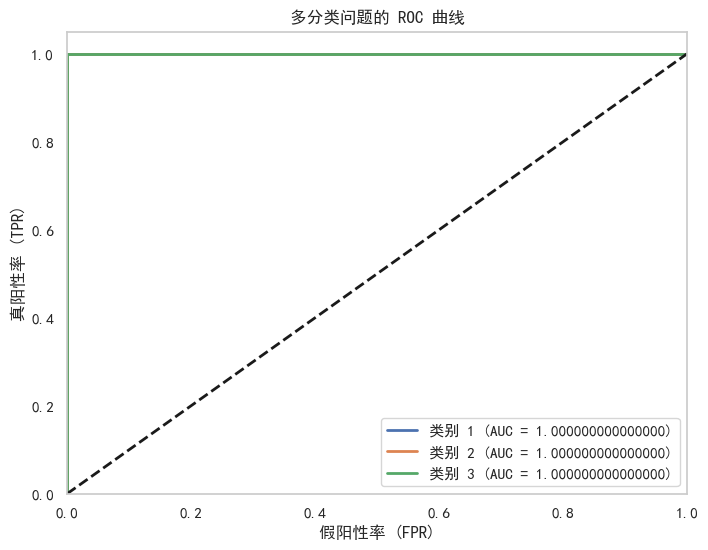

In [106]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# 假设类别数量
num_classes = len(np.unique(y_test))

# 二进制化标签，方便多类别计算
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])

# 初始化 ROC 曲线图
plt.figure(figsize=(8, 6))

# 分别为每个类别绘制 ROC 曲线并计算 AUC
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    # 绘制 ROC 曲线
    plt.plot(fpr, tpr, lw=2, label=f'类别 {i+1} (AUC = {roc_auc:.15f})')
    # 输出 AUC 值，显示完整小数位数
    print(f"类别 {i+1} 的 AUC 值：{roc_auc:.15f}")

# 绘制随机猜测的参考线
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 图形标签和标题
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率 (FPR)')
plt.ylabel('真阳性率 (TPR)')
plt.title('多分类问题的 ROC 曲线')
plt.legend(loc="lower right")
plt.grid()
plt.show()


结果中每个类别的 AUC 值都为 1.0，表明模型在测试集上的表现是很好的。由于数据集较小，且训练测试集比例为8:2，数据特征较为明显。

#### **下面是训练集测试集6:4的相关结果：**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\2945341759.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  likelihood += np.log(gaussian_pdf(X[i, j], stats[c]['mean'][j], stats[c]['var'][j]))
C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\82980077.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean = stats[c]['mean'][j]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_41184\82980077.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

混淆矩阵：
[[22  2  0]
 [ 1 28  0]
 [ 0  0 19]]

每个类别的精度、召回率和 F1 分数：
类别 1 - 精度：0.9565217391304348, 召回率：0.9166666666666666, F1 分数：0.9361702127659574
类别 2 - 精度：0.9333333333333333, 召回率：0.9655172413793104, F1 分数：0.9491525423728815
类别 3 - 精度：1.0, 召回率：1.0, F1 分数：1.0
类别 1 的 AUC 值：0.997395833333333
类别 2 的 AUC 值：0.997594226142743
类别 3 的 AUC 值：1.000000000000000


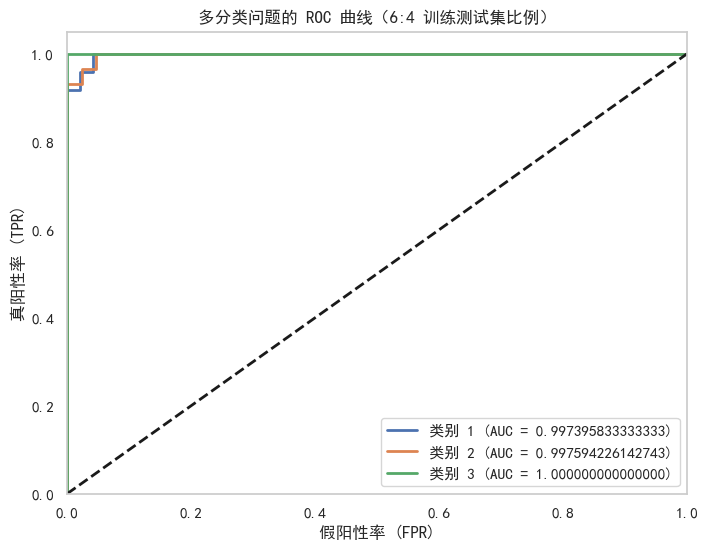

In [107]:
# 重新划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# 计算训练集统计量（如均值和方差）
stats = {}
priors = y_train.value_counts(normalize=True).to_dict()
for c in np.unique(y_train):
    stats[c] = {
        "mean": X_train[y_train == c].mean(),
        "var": X_train[y_train == c].var()
    }

# 计算混淆矩阵并输出每个类别的精度、召回率和 F1 分数
y_pred = predict(X_test.values, stats, priors)
conf_matrix = compute_confusion_matrix(y_test.values, y_pred, len(np.unique(y_test)))
precision_per_class, recall_per_class, f1_per_class = compute_metrics_per_class(conf_matrix)

# 输出混淆矩阵和分类指标
print("混淆矩阵：")
print(conf_matrix)
print("\n每个类别的精度、召回率和 F1 分数：")
for i in range(len(np.unique(y_test))):
    print(f"类别 {i + 1} - 精度：{precision_per_class[i]}, 召回率：{recall_per_class[i]}, F1 分数：{f1_per_class[i]}")

# 计算并绘制 ROC 曲线和 AUC
y_score = predict_proba(X_test.values, stats, priors)  # 获取预测的概率分布
plt.figure(figsize=(8, 6))
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])

for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'类别 {i+1} (AUC = {roc_auc:.15f})')
    print(f"类别 {i+1} 的 AUC 值：{roc_auc:.15f}")

# 绘制随机猜测的参考线
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# 图形标签和标题
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率 (FPR)')
plt.ylabel('真阳性率 (TPR)')
plt.title('多分类问题的 ROC 曲线（6:4 训练测试集比例）')
plt.legend(loc="lower right")
plt.grid()
plt.show()

在 6:4 的训练测试集比例下，模型依然保持了很高的分类性能。类别 1 和类别 2 的 AUC 值接近 1，类别 3 的 AUC 值达到 1.0，说明模型对每个类别都有很强的区分能力。尽管训练测试比例改变，模型的泛化能力依然较强，未出现明显的过拟合或欠拟合情况。这表明模型在当前数据集上能够较好地分类各个类别。